In [1]:
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as pyplot
import tensorflow as tf

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

/home/tomasz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tomasz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tomasz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tomasz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 


In [17]:
from sklearn.preprocessing import label_binarize

y_bin_train = label_binarize(y_train, classes=[*range(10)])
y_bin_test = label_binarize(y_test, classes=[*range(10)])

In [20]:
y_bin_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [21]:
model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Druga warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# trzecia warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))


# czwarta warstwa konwolucyjna
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)         

In [22]:
x_train[0].shape

(32, 32, 3)

In [23]:

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:



x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255




In [46]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/9
50000/50000 [==============================] - 89s 2ms/sample - loss: 2.0913 - acc: 0.2067 - val_loss: 2.0726 - val_acc: 0.2140
Epoch 2/9
50000/50000 [==============================] - 99s 2ms/sample - loss: 2.0132 - acc: 0.2369 - val_loss: 1.9217 - val_acc: 0.2809
Epoch 3/9
50000/50000 [==============================] - 88s 2ms/sample - loss: 1.9183 - acc: 0.2741 - val_loss: 1.9208 - val_acc: 0.3069
Epoch 4/9
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.8337 - acc: 0.3091 - val_loss: 1.8360 - val_acc: 0.3354
Epoch 5/9
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.7592 - acc: 0.3446 - val_loss: 1.6745 - val_acc: 0.3933
Epoch 6/9
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.6829 - acc: 0.3769 - val_loss: 1.6379 - val_acc: 0.4174
Epoch 7/9
50000/50000 [==============================] - 88s 2ms/sample - loss: 1.6170 - acc: 0.4001 - val_loss: 1.5506 - 

In [47]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4930235975265502
Test accuracy: 0.4459


In [57]:
import numpy as np

def zamien(y_pred):
    res = np.empty((y_pred.shape[0], 10))
    for pred in range(len(y_pred)):
        pres = np.empty(10)
        for i in range(10):
            if i == y_pred[pred]:
                pres[i] = 1
            else:
                pres[i] = 0
        res[pred] = pres
    return res

def zmaksuj(y_pred):
    res = np.array(y_pred, copy=True)
    for pred in range(len(y_pred)):
        argmax = y_pred[pred].argmax()
        for i in range(10):
            if i == argmax:
                res[pred][i] = 1
            else:
                res[pred][i] = 0
    return res
                
        

In [48]:
from sklearn.metrics import log_loss

y_zmodelu = model.predict(x_test)
log_loss(y_test, zmaksuj(y_zmodelu))

19.137936001968384

In [50]:
layer_name = "flatten"
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)


intermediate_output = intermediate_layer_model.predict(x_train)

In [51]:
intermediate_output.shape

(50000, 128)

In [52]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(intermediate_output, y_train)

/home/tomasz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(intermediate_layer_model.predict(x_test))

accuracy_score(y_test, y_pred)

0.5317

In [54]:
from sklearn.metrics import log_loss

log_loss(y_test, zamien(y_pred))

16.17450898573668

In [55]:
y_bin_pred = label_binarize(y_pred,  classes=[*range(10)])
y_bin_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [31]:
y_bin_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

Text(0.5, 1.0, 'SVM P-R')

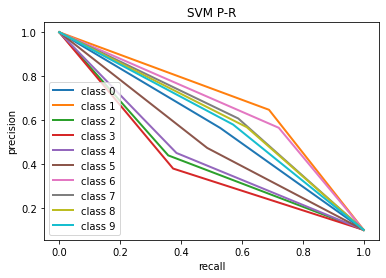

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve
for i in range(10):
    p, r, _ = precision_recall_curve(y_bin_test[:, i], y_bin_pred[:, i])
    plt.plot(r, p, lw=2, label='class {}'.format(i))
    
plt.legend(loc="best")
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("SVM P-R")

Text(0.5, 1.0, 'SVM ROC')

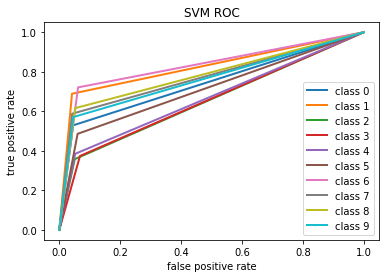

In [65]:
for i in range(10):
    fpr, tpr, _ = roc_curve(y_bin_test[:, i], y_bin_pred[:, i])
    plt.plot(fpr, tpr, lw=2, label='class {}'.format(i))
    
plt.legend(loc="best")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("SVM ROC")

Text(0.5, 1.0, 'CNN P-R')

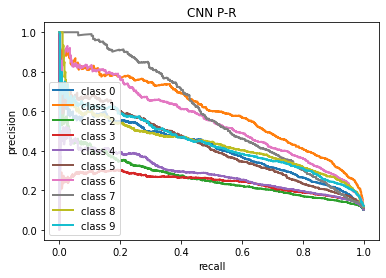

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve
for i in range(10):
    p, r, _ = precision_recall_curve(y_bin_test[:, i], y_zmodelu[:, i])
    plt.plot(r, p, lw=2, label='class {}'.format(i))
    
plt.legend(loc="best")
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("CNN P-R")

Text(0.5, 1.0, 'CNN ROC')

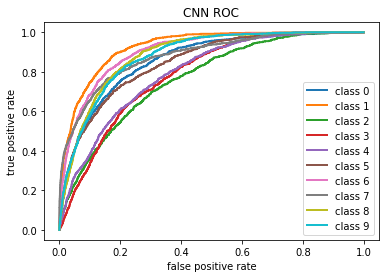

In [66]:
for i in range(10):
    fpr, tpr, _ = roc_curve(y_bin_test[:, i], y_zmodelu[:, i])
    plt.plot(fpr, tpr, lw=2, label='class {}'.format(i))
    
plt.legend(loc="best")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("CNN ROC")